## Selected 6 Socioeconomic Indicators in Chicago

The city of Chicago released a dataset of socioeconomic data to the Chicago City Portal.
This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

Scores on the hardship index can range from 1 to 100, with a higher index number representing a greater level of hardship.

A detailed description of the dataset can be found on [the city of Chicago's website](https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01), but to summarize, the dataset has the following variables:

*   **Community Area Number** (`ca`): Used to uniquely identify each row of the dataset

*   **Community Area Name** (`community_area_name`): The name of the region in the city of Chicago

*   **Percent of Housing Crowded** (`percent_of_housing_crowded`): Percent of occupied housing units with more than one person per room

*   **Percent Households Below Poverty** (`percent_households_below_poverty`): Percent of households living below the federal poverty line

*   **Percent Aged 16+ Unemployed** (`percent_aged_16_unemployed`): Percent of persons over the age of 16 years that are unemployed

*   **Percent Aged 25+ without High School Diploma** (`percent_aged_25_without_high_school_diploma`): Percent of persons over the age of 25 years without a high school education

*   **Percent Aged Under** 18 or Over 64:Percent of population under 18 or over 64 years of age (`percent_aged_under_18_or_over_64`): (ie. dependents)

*   **Per Capita Income** (`per_capita_income_`): Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population

*   **Hardship Index** (`hardship_index`): Score that incorporates each of the six selected socioeconomic indicators




## Key Tasks: Use SQL in python, creating tables in python, using scatterplots, and T-test to find correlation and significane between variables

## Objectives

### 1. Find the relationship of Per Captia Income to Hardship Index in the rural communites of Chicago

In [4]:
!pip install ipython-sql
%load_ext sql


In [5]:
import csv, sqlite3

con = sqlite3.connect("socioeconomic.db")
cur = con.cursor()
!pip install -q pandas==1.1.5

In [6]:
%sql sqlite:///socioeconomic.db

In [30]:
import pandas as pd
df = pd.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql("chicago_socioeconomic_data", con, if_exists='replace', index=False,method="multi")

In [31]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


### Problem 1

##### How many rows are in the dataset?

In [32]:
%sql Select COUNT(*) FROM chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


COUNT(*)
78


### Problem 2

##### How many community areas in Chicago have a hardship index greater than 50.0?

In [33]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index > 50;




 * sqlite:///socioeconomic.db
Done.


COUNT(*)
38


### Problem 3

##### What is the maximum value of hardship index in this dataset?

In [34]:
%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


MAX(hardship_index)
98.0


### Problem 4

##### Which community area which has the highest hardship index?


In [35]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE hardship_index= (SELECT MAX(hardship_index) FROM chicago_socioeconomic_data);

 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


### Problem 5

##### Which Chicago community areas have per-capita incomes greater than $60,000?

In [36]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000

 * sqlite:///socioeconomic.db
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


### Problem 6

##### Create a JOINT-scatter plot using the variables `per_capita_income_` and `hardship_index`. Explain the correlation between the two variables.


 * sqlite:///socioeconomic.db
Done.


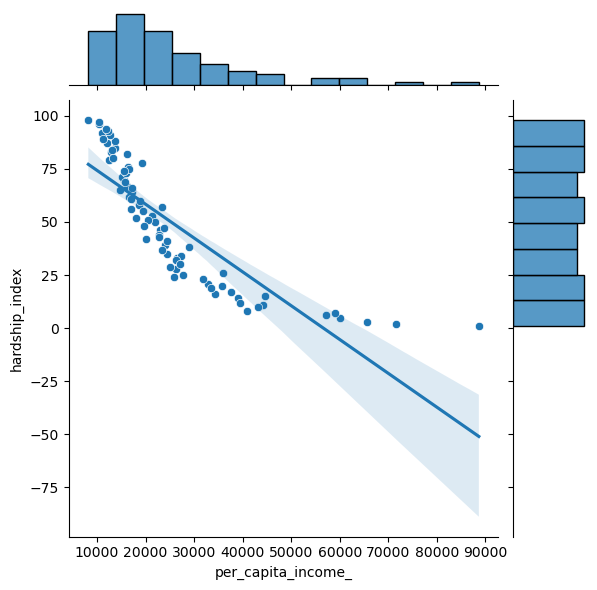

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

# Execute SQL query using %sql magic command
income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;

# Convert the result to a pandas DataFrame
income_vs_hardship_df = income_vs_hardship.DataFrame()

# Create a joint plot using seaborn without a regression line
plot = sns.jointplot(x='per_capita_income_', y='hardship_index', data=income_vs_hardship_df, kind='scatter')

# Add a regression line to the joint plot
sns.regplot(x='per_capita_income_', y='hardship_index', data=income_vs_hardship_df, scatter=False, ax=plot.ax_joint)

# Display the plot
plt.show()


In [46]:
slope, intercept, r_value, p_value, std_err = linregress(income_vs_hardship_df['per_capita_income_'], income_vs_hardship_df['hardship_index'])
line_kws={"label": f"R² = {round(r_value**2, 3)}"}
print(f"R-squared value: {round(r_value**2, 3)}")


R-squared value: nan


### The R-squared value shows 'nan' due to missing values in the ca and hardship_index as shown below

In [40]:
import pandas as pd

# Assuming 'con' is the SQLite connection object
con = sqlite3.connect('socioeconomic.db')

# Read the SQLite table into a DataFrame
df = pd.read_sql('SELECT * FROM chicago_socioeconomic_data', con)

# Check for missing values
missing_values = df.isnull().sum()

print("Missing values:")
print(missing_values)

Missing values:
ca                                             1
community_area_name                            0
percent_of_housing_crowded                     0
percent_households_below_poverty               0
percent_aged_16_unemployed                     0
percent_aged_25_without_high_school_diploma    0
percent_aged_under_18_or_over_64               0
per_capita_income_                             0
hardship_index                                 1
dtype: int64


### To give a valid value (r-value), we need to drop the missing value in hardship index, which is used calucate the r-value

In [41]:
import pandas as pd
from scipy.stats import linregress

# Assuming 'con' is the SQLite connection object
con = sqlite3.connect('socioeconomic.db')

# Read the SQLite table into a DataFrame
df = pd.read_sql('SELECT * FROM chicago_socioeconomic_data', con)

# Drop rows with missing values
df_cleaned = df.dropna(subset=['per_capita_income_', 'hardship_index'])

# Perform regression analysis
slope, intercept, r_value, p_value, std_err = linregress(df_cleaned['per_capita_income_'], df_cleaned['hardship_index'])

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared value: {round(r_value**2, 3)}")


Slope: -0.0015930772130313003
Intercept: 90.23059526430055
R-squared value: 0.721


## Conducting T-test (with scatterplot graph) to determine if there is significance between per_captia_income and Hardship index in the chicago communities.

Pearson correlation coefficient: -0.849167462930786
P-value: 1.7257814685296155e-22


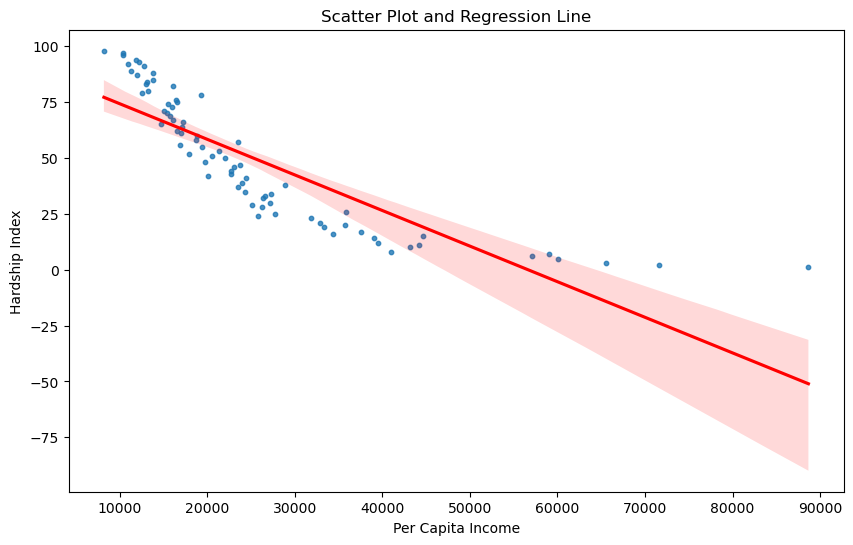

In [68]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# Read CSV from URL
df = pd.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')

# Drop rows with NaN values in the selected columns
df_cleaned = df[['per_capita_income_', 'hardship_index']].dropna()

# Extract cleaned columns
per_capita_income = df_cleaned['per_capita_income_']
hardship_index = df_cleaned['hardship_index']

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(per_capita_income, hardship_index)

# Display the results
print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Plot a scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=per_capita_income, y=hardship_index, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Scatter Plot and Regression Line')
plt.xlabel('Per Capita Income')
plt.ylabel('Hardship Index')
plt.show()



## Final conclusion 

### 1. There is a *strong negative correlation* between per_capita_income and hardship_index due to having a strong PCC value of -.849, indicating negative correlation.

### 2. The p-value is below .05 (actual p-value: 1.72 x 10^-22) indicating the inverse relationship between per captia income and hardship is highly significant.

### 3. This means on average, as per_captia_income increases, the hardship_index within the rural community of chicago decreases and vice-versa